# Running WOT and moscot

This notebook collects and plots the results from the memory and time benchmark

In [1]:
import scanpy as sc
import anndata
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Path="/home/mgander/moscot-framework_reproducibility/data/mouse_temporal"

# Memory

In [2]:
sizes=np.linspace(25,275,11, dtype=int)

In [3]:
methods=['WOT','offline', 'online', 'LR_50', 'LR_200', 'LR_500', 'LR_2000']

In [4]:
frames=[]
for m in methods:
    if m in ['WOT', 'offline']:
        sizes=sizes=np.linspace(25,100,4, dtype=int)
    else:
        sizes=np.linspace(25,275,11, dtype=int)

    for s in sizes:
    
        D=np.load(f'{Path}/Benchmark/{m}_{s}_CPU.npy', allow_pickle=True)
        D = dict(enumerate(D.flatten(), 1))[1]
        
        mem=max(D[s])/1000
        t=D[f'{s}_time']
        
        frames.append(pd.DataFrame({'Method':[m], 'Memory':mem, 'Time':t, 'Cells':s}))

In [5]:
Dfm=pd.concat(frames, ignore_index=True)

# Time

In [10]:
frames=[]
for m in methods:
    if m in ['WOT', 'offline']:
        sizes=sizes=np.linspace(25,100,4, dtype=int)
        device='CPU'
    elif m=='LR_2000':
        sizes=sizes=np.linspace(25,175,7, dtype=int)
        device='GPU'
    else:
        sizes=np.linspace(25,275,11, dtype=int)
        device='GPU'

    for s in sizes:
    
        D=np.load(f'{Path}/Benchmark/{m}_{s}_{device}.npy', allow_pickle=True)
        D = dict(enumerate(D.flatten(), 1))[1]
        
        mem=max(D[s])/1000
        t=D[f'{s}_time']
        
        frames.append(pd.DataFrame({'Method':[m], 'Memory':mem, 'Time':t, 'Cells':s}))

In [11]:
Dft=pd.concat(frames, ignore_index=True)

# Plots for the figure

### Plot only WOT, moscot-batch mode and LR_500

In [13]:
wot=np.array([126, 151, 186])/255
bl=np.array([0,102,164])/255
gr=np.array([98,9,123])/255
w=np.array([1,1,1])
ch=np.array([10, 53, 194])/255

ch=np.array([10,3,144])/255


paln=[wot, ch, bl]

In [14]:
d={}
d['online']='moscot'
d['LR_500']='moscot - low rank'
d['WOT']='WOT'

od={}
od['online']=2
od['LR_500']=1
od['WOT']=0

Dfms=Dfm[Dfm['Method'].isin(['WOT','online','LR_500'])].copy()
Dfts=Dft[Dft['Method'].isin(['WOT','online','LR_500'])].copy()


Dfms['Method_name']=[d[a] for a in Dfms.Method]
Dfts['Method_name']=[d[a] for a in Dfts.Method]
Dfms['Order']=[od[a] for a in Dfms.Method]
Dfts['Order']=[od[a] for a in Dfts.Method]

In [15]:
Dfms=Dfms.sort_values('Order')
Dfts=Dfts.sort_values('Order')

In [16]:
import mplscience
mplscience.set_style(reset_current=True)

In [17]:
paln[2]=np.array([13,111,178])/255

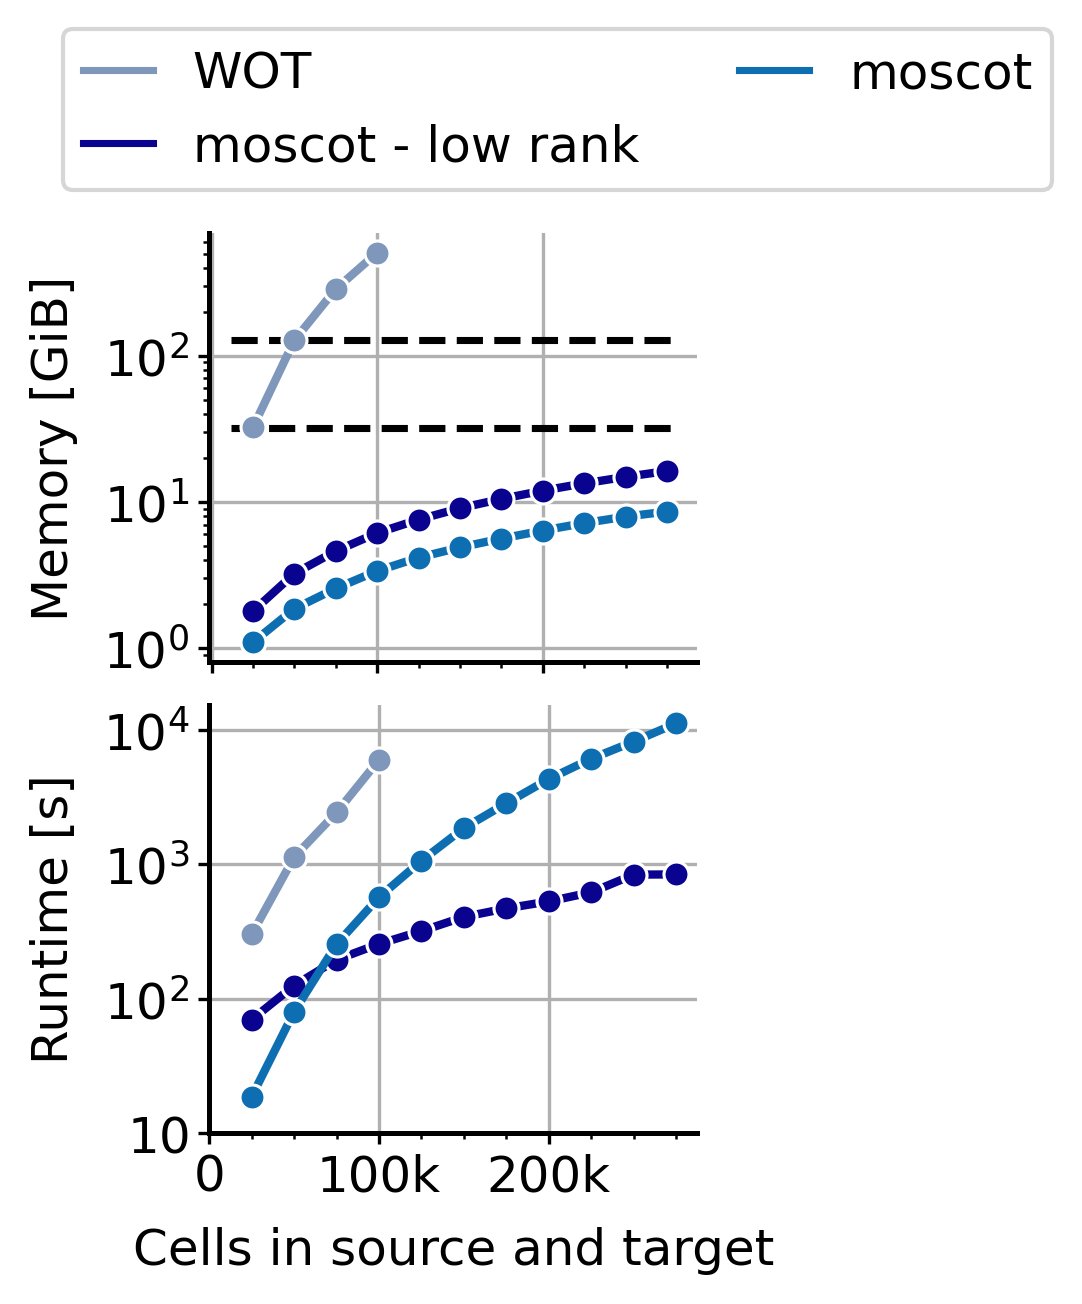

In [19]:
fontsize=12

r=0.7
y=3

fig, ax = plt.subplots(ncols=2, figsize=(y*r, y), dpi=300)
plt.clf()

plt.subplot(2, 1, 1) # 1 row, 2 cols, subplot 1

plt.subplots_adjust(bottom=0, top=1, hspace=0.1)

g2=sns.lineplot(data=Dfms, x='Cells', y='Memory', hue='Method_name', palette=paln, linewidth = 2, marker='o', 
                zorder=100)

g2.set_yscale('log')
g2.set_ylabel(ylabel='Memory [GiB]', fontsize=fontsize)
g2.set_yticks([10**0,10**1,10**2], fontsize=fontsize)
g2.set_yticklabels(['$10^0$','$10^1$','$10^2$'], fontsize=fontsize)



g2.tick_params(axis='x', which='major', labelsize=fontsize)
plt.plot([12,280], [32,32], 'k--')
plt.plot([12,280], [128,128], 'k--')
#plt.text(230,150,'Server', fontfamily=fontfamily, fontsize=fontsize)
#plt.text(230,40,'Laptop', fontfamily=fontfamily, fontsize=fontsize)


g2.set_xticks([0,100,200], fontsize=fontsize)
g2.set_xticklabels(labels=['','',''],fontsize=0)
g2.set_xticks([25, 50, 75, 125,150,175,225,250,275], minor=True)
g2.set(xlabel=None)
g2.set_xlabel(xlabel='', fontsize=fontsize)
g2.grid()
#g2.grid(b=True, which='minor', color='gray', linestyle='-', linewidth=0.3, axis='x')

plt.subplot(2, 1, 2) # 1 row, 2 cols, subplot 2

g1=sns.lineplot(data=Dfts, x='Cells', y='Time', hue='Method_name', legend=False, palette=paln, linewidth = 2,
               marker='o', zorder=100)
g1.set_yscale('log')
g1.set_ylabel(ylabel='Runtime [s]', fontsize=fontsize)
g1.set_yticks([10**1,10**2,10**3,10**4], fontsize=fontsize)
g1.set_yticklabels(['$10$','$10^2$','$10^3$','$10^4$'], fontsize=fontsize)
g1.tick_params(axis='x', which='major', labelsize=fontsize)

g1.set_xticks([0,100,200], fontsize=fontsize)
g1.set_xticklabels(['0','100k', '200k'], fontsize=fontsize)
g1.set_xticks([25, 50, 75, 125,150,175,225,250,275], minor=True)
#g1.set_xticks([], fontsize=0.001)
g1.set_xlabel(xlabel='Cells in source and target', fontsize=fontsize)
g1.grid()

sns.move_legend(obj=g2, loc=(-0.3,1.1), ncol=2, title_fontsize=fontsize, title_weight='bold', fontsize=fontsize,
               fancybox=True, frameon=True, title='')

plt.show()